In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Data/Kaggle/StoreSales/processed_train_v2.csv', parse_dates=['date'], dayfirst=True)

In [3]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,typeholiday,dcoilwtico,city,state,typestores,cluster,day_of_week,day,month,year
0,0,2013-01-01,1,0,0.0,0,3,93.14,18,12,3,13,2,1,1,2013
1,1,2013-01-01,1,1,0.0,0,3,93.14,18,12,3,13,2,1,1,2013
2,2,2013-01-01,1,2,0.0,0,3,93.14,18,12,3,13,2,1,1,2013
3,3,2013-01-01,1,3,0.0,0,3,93.14,18,12,3,13,2,1,1,2013
4,4,2013-01-01,1,4,0.0,0,3,93.14,18,12,3,13,2,1,1,2013


In [4]:
df = df[(df['store_nbr'] == 1) & (df['family'] == 3)]

In [5]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,typeholiday,dcoilwtico,city,state,typestores,cluster,day_of_week,day,month,year
3,3,2013-01-01,1,3,0.0,0,3,93.14000,18,12,3,13,2,1,1,2013
1785,1785,2013-01-02,1,3,1091.0,0,4,93.14000,18,12,3,13,3,2,1,2013
3567,3567,2013-01-03,1,3,919.0,0,4,92.97000,18,12,3,13,4,3,1,2013
5349,5349,2013-01-04,1,3,953.0,0,4,93.12000,18,12,3,13,5,4,1,2013
7131,7131,2013-01-05,1,3,1160.0,0,4,93.12009,18,12,3,13,6,5,1,2013


In [6]:
df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

In [7]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [8]:
model = Prophet()
model.fit(train)

03:19:30 - cmdstanpy - INFO - Chain [1] start processing
03:19:30 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = model.make_future_dataframe(periods=len(test))

In [10]:
forecast = model.predict(future)

In [11]:
y_pred = forecast.iloc[-len(test):]['yhat'].values

In [12]:
y_true = test['y'].values

In [13]:
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
rmsle = np.sqrt(mean_squared_error(np.log1p(test['y']), np.log1p(y_pred)))

In [14]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

Root Mean Squared Error (RMSE): 653.0936302929073
Root Mean Squared Logarithmic Error (RMSLE): 0.5537333343983055


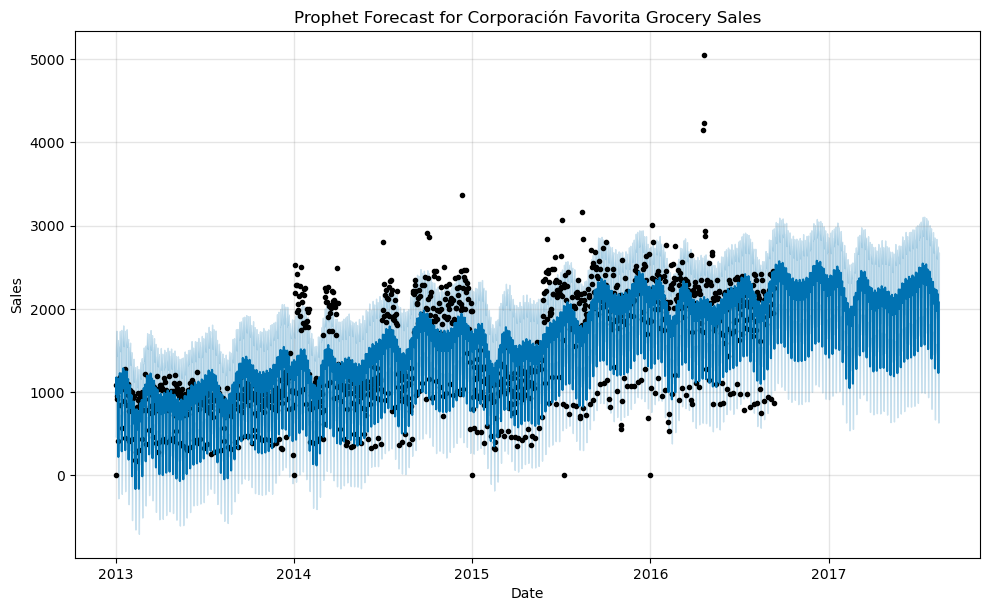

In [15]:
fig = model.plot(forecast)
plt.title('Prophet Forecast for Corporación Favorita Grocery Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()